<a href="https://colab.research.google.com/github/tigerrex9/Senior-Project/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

In [2]:
%load_ext tensorboard
import tensorboard

In [3]:
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=None,
                          title='Confusion Matrix', plot_numbers=False, display_names=None,
                          figsize=(15, 11)):

    cm = confusion_matrix(y_true, y_pred, labels=class_names, normalize=normalize)
    
    if not display_names:
        display_names = class_names
    df_cm = pd.DataFrame(cm, index=display_names, columns=display_names)
    fig = plt.figure(figsize=figsize)
    sns.heatmap(df_cm, annot=plot_numbers, cmap='Blues', fmt='g')
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    #return fig

def plot_graphs(history, best):
  
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
batch_size = 256
epochs = 20

checkpoint = ModelCheckpoint(
    "best_model",
    verbose = 0,
    monitor = "val_loss",
    save_best_only = True,
    mode = "auto",
)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

model.compile(
    optimizer= keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )

model_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks= [checkpoint, tensorboard_callback],
)

model_performance = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
211/211 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.8454

211/211 [==============================] - 18s 14ms/step - loss: 0.5113 - accuracy: 0.8454 - val_loss: 0.1087 - val_accuracy: 0.9707
Epoch 2/20
210/211 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9586

211/211 [==============================] - 2s 11ms/step - loss: 0.1375 - accuracy: 0.9586 - val_loss: 0.0678 - val_accuracy: 0.9808
Epoch 3/20
203/211 [===========================>..] - ETA: 0s - loss: 0.1000 - accuracy: 0.9693

211/211 [==============================] - 2s 10ms/step - loss: 0.0997 - accuracy: 0.9693 - val_loss: 0.0544 - val_accuracy: 0.9848
Epoch 4/20
207/211 [============================>.] - ETA: 0s - loss: 0.0826 - accuracy: 0.9743

211/211 [==============================] - 2s 10ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0463 - val_accuracy: 0.9875
Epoch 5/20
205/211 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9776

211/211 [==============================] - 2s 10ms/step - loss: 0.0715 - accuracy: 0.9779 - val_loss: 0.0432 - val_accuracy: 0.9885
Epoch 6/20
206/211 [============================>.] - ETA: 0s - loss: 0.0632 - accuracy: 0.9800

211/211 [==============================] - 3s 12ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.0394 - val_accuracy: 0.9892
Epoch 7/20
205/211 [============================>.] - ETA: 0s - loss: 0.0576 - accuracy: 0.9823

211/211 [==============================] - 2s 10ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 8/20
204/211 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9827

211/211 [==============================] - 2s 10ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 9/20
204/211 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9837

211/211 [==============================] - 2s 11ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 10/20
203/211 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9850

211/211 [==============================] - 2s 10ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 11/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 12/20
206/211 [============================>.] - ETA: 0s - loss: 0.0433 - accuracy: 0.9865

211/211 [==============================] - 3s 14ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0313 - val_accuracy: 0.9922
Epoch 13/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0316 - val_accuracy: 0.9915
Epoch 14/20
204/211 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9873

211/211 [==============================] - 2s 10ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0286 - val_accuracy: 0.9915
Epoch 15/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0297 - val_accuracy: 0.9915
Epoch 16/20
211/211 [==============================] - 1s 6ms/step - loss: 0.0371 - accuracy: 0.9877 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 17/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0291 - val_accuracy: 0.9908
Epoch 18/20
205/211 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9885

211/211 [==============================] - 3s 12ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 19/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0281 - val_accuracy: 0.9927
Epoch 20/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9918


In [ ]:
%tensorboard --logdir logs

Test loss: 0.024772103875875473
Test accuracy: 0.9918000102043152


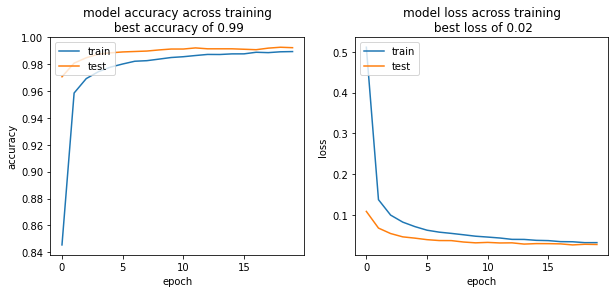

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_graphs(model_history, model_performance)

In [10]:
y_test_class = np.argmax(y_test, axis = 1)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_max = np.zeros(y_pred.shape)
y_pred_max[np.arange(y_pred.shape[0]), y_pred_class] = 1

313/313 [==============================] - 1s 3ms/step


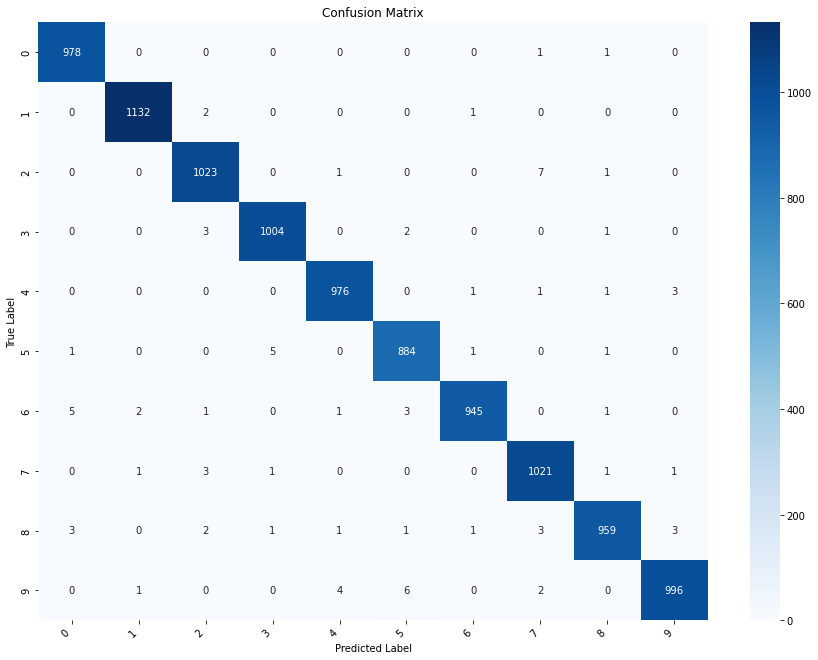

In [12]:
label_names = ['0','1','2','3','4','5','6','7','8','9']
labels = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(y_test_class, y_pred_class, labels, plot_numbers = True, display_names = label_names)

In [25]:
print(np.shape(x_test[1]))
print(np.shape(np.expand_dims(x_test[1], axis=(0))))


(28, 28, 1)
(1, 28, 28, 1)


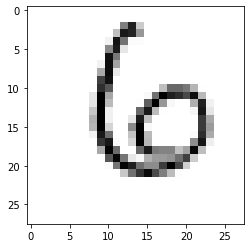

label: 6
prediction: [6]


In [41]:
selection = 100
result = np.argmax(model(np.expand_dims(x_test[selection], axis=(0))), axis=(1))
plt.imshow(x_test[selection], cmap='gray_r')
plt.show()
print("label:", np.argmax(y_test[selection], axis=(0)))
print("prediction:", result)